**ANN**

In [ ]:
# Gerekli kütüphaneleri yükleyelim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/balanced_milk.csv')

print(data)

       pH  Temprature  Taste  Odor  Fat   Turbidity  Colour  Grade
0     6.6          35      1     0     1          0     254      0
1     6.6          36      0     1     0          1     253      0
2     8.5          70      1     1     1          1     246      1
3     9.5          34      1     1     0          1     255      1
4     6.6          37      0     0     0          0     255      2
...   ...         ...    ...   ...   ...        ...     ...    ...
1282  6.5          36      0     0     0          0     247      2
1283  6.8          45      0     0     1          0     255      2
1284  6.5          38      1     0     0          0     255      2
1285  6.5          36      0     0     1          0     255      2
1286  6.5          38      1     0     1          0     255      2

[1287 rows x 8 columns]


In [ ]:
# Bağımsız değişkenler (X) ve bağımlı değişken (y) ayırma
X = data.drop('Grade', axis=1)
y = data['Grade']

In [ ]:
# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Veriyi standartlaştıralım (önemli özellik ölçeklendirme)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Yapay Sinir Ağı (ANN) modelini oluşturalım
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification için sigmoid aktivasyon
])

In [ ]:
# Modeli derleyelim
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Modeli eğitelim
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=8, validation_data=(X_test_scaled, y_test), verbose=1)

Epoch 1/50
129/129 [==============================] - 2s 6ms/step - loss: -0.0370 - accuracy: 0.4052 - val_loss: -1.0645 - val_accuracy: 0.3992
Epoch 2/50
129/129 [==============================] - 0s 3ms/step - loss: -3.3300 - accuracy: 0.4363 - val_loss: -8.4476 - val_accuracy: 0.4535
Epoch 3/50
129/129 [==============================] - 1s 4ms/step - loss: -16.5540 - accuracy: 0.4645 - val_loss: -32.5827 - val_accuracy: 0.4380
Epoch 4/50
129/129 [==============================] - 1s 4ms/step - loss: -51.0658 - accuracy: 0.4606 - val_loss: -87.6906 - val_accuracy: 0.4535
Epoch 5/50
129/129 [==============================] - 0s 3ms/step - loss: -120.6547 - accuracy: 0.4519 - val_loss: -188.0212 - val_accuracy: 0.4535
Epoch 6/50
129/129 [==============================] - 0s 3ms/step - loss: -237.2825 - accuracy: 0.4752 - val_loss: -346.4197 - val_accuracy: 0.4535
Epoch 7/50
129/129 [==============================] - 0s 4ms/step - loss: -411.2520 - accuracy: 0.4665 - val_loss: -575.6357

In [ ]:
# Modelin performansını değerlendirelim
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

9/9 - 0s - loss: -1.1794e+05 - accuracy: 0.4341 - 42ms/epoch - 5ms/step

Test accuracy: 0.43410852551460266


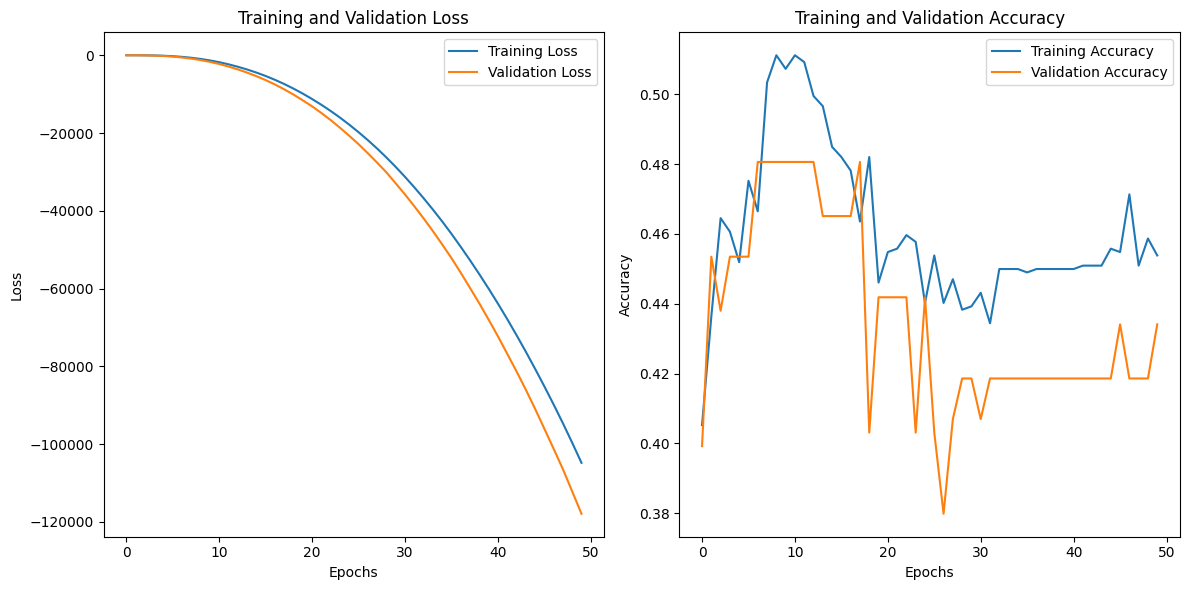

In [ ]:
# Eğitim ve doğrulama için kayıp ve doğruluk grafiğini çizdirelim
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Eğitim ve doğrulama kaybı
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Eğitim ve doğrulama doğruluğu
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

9/9 [==============================] - 0s 2ms/step


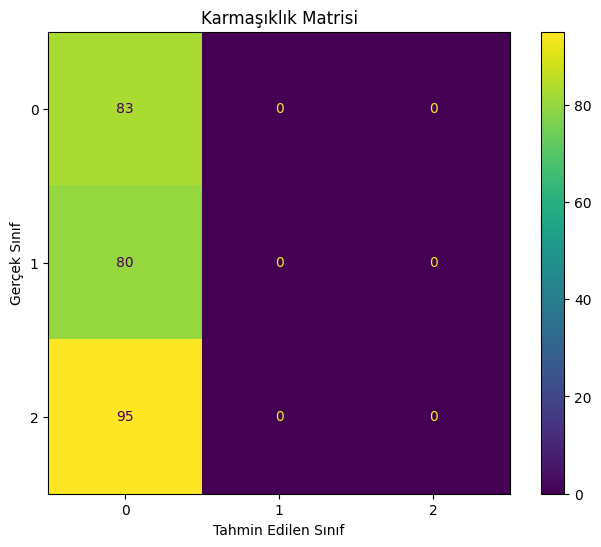

Confusion Matrix:
[[83  0  0]
 [80  0  0]
 [95  0  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.32      1.00      0.49        83
           1       0.00      0.00      0.00        80
           2       0.00      0.00      0.00        95

    accuracy                           0.32       258
   macro avg       0.11      0.33      0.16       258
weighted avg       0.10      0.32      0.16       258

Accuracy: 0.32
Precision: 0.10
Recall: 0.32
F1-score: 0.16


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Çıkışı binary hale getirme

class_names = ['0','1','2']
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=np.unique(y), columns=np.unique(y))

# Karmaşıklık matrisini çizme
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
disp.plot(ax=ax)
plt.title("Karmaşıklık Matrisi")
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.show()
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


# Classification report (precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=np.unique(y), columns=np.unique(y))
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

**LOGISTIC REGRESSION**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/balanced_milk.csv')

print(data)

       pH  Temprature  Taste  Odor  Fat   Turbidity  Colour  Grade
0     6.6          35      1     0     1          0     254      0
1     6.6          36      0     1     0          1     253      0
2     8.5          70      1     1     1          1     246      1
3     9.5          34      1     1     0          1     255      1
4     6.6          37      0     0     0          0     255      2
...   ...         ...    ...   ...   ...        ...     ...    ...
1282  6.5          36      0     0     0          0     247      2
1283  6.8          45      0     0     1          0     255      2
1284  6.5          38      1     0     0          0     255      2
1285  6.5          36      0     0     1          0     255      2
1286  6.5          38      1     0     1          0     255      2

[1287 rows x 8 columns]


In [ ]:
# Bağımsız değişkenler (X) ve bağımlı değişken (y) ayırma
X = data.drop('Grade', axis=1)
y = data['Grade']

In [ ]:
# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Eğer üç sınıf varsa, binary sınıflandırma yapmak için bir sınıfı dışarıda bırakabiliriz.
print(y.unique())

[0 1 2]


In [ ]:
# Burada sadece 0 ve 1 sınıflarını alalım, 2'yi dışarıda bırakalım
#df_binary = data[data['Grade'] != 2]

In [ ]:
X = df_binary.drop('Grade', axis=1)
y = df_binary['Grade']


In [ ]:
# Veriyi eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Veriyi standartlaştıralım
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Lojistik regresyon modeli oluşturalım ve eğitelim
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
# Modelin performansını değerlendirelim
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]


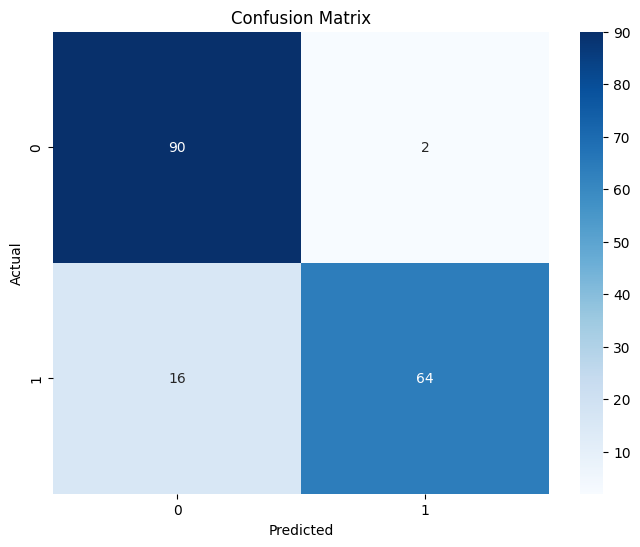

In [ ]:
# Karmaşıklık matrisi
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



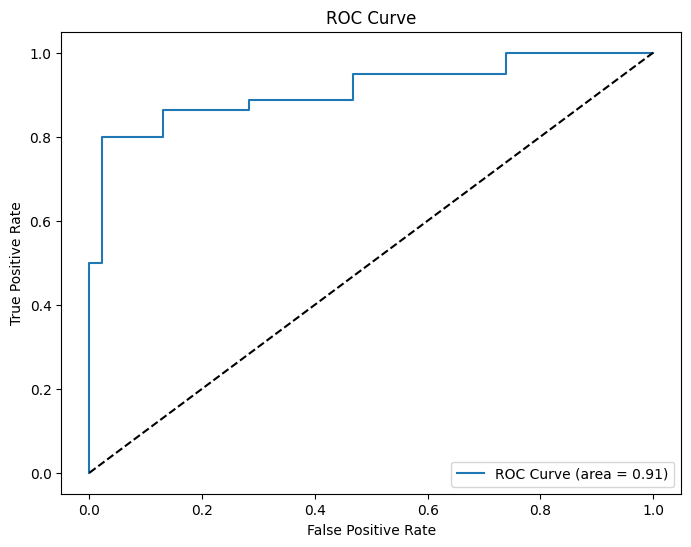

In [ ]:
# ROC Eğrisi
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()